Test Amadeus (updated le 05/07/16)
Antoine PHAM

In [1]:
%matplotlib inline
import pandas as pd                     # charge un package pour le dataframe
import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques
import csv                              # charge un package pour lire csv


Exercise 1: count the number of lines in Python for each file

L'ordinateur dont je dispose actuellement ne contient que 6Gb, j'ai du opter pour cette methode pour pour pouvoir lire les fichiers csv en entier.

In [2]:
booking= open('bookings.csv','r')
search= open('searches.csv','r')
num_rows_b = sum(1 for line in booking)
num_rows_s = sum(1 for line in search)
print "There are %d rows in the 'booking data'"%(num_rows_b)
print "and %d rows in the 'search data'."%(num_rows_s)
booking.close()
search.close()

There are 10000011 rows in the 'booking data'
and 20390199 rows in the 'search data'.


Exercise 2: top 10 arrival airports in the world in 2013 (using the bookings file)? Arrival airport is the column arr_port. It is the IATA code for the airport To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings). Print the top 10 arrival airports in the standard output, including the number of passengers.

REMARQUES: pour la question de capacite de memoire, cet exercise a ete fait sur sur un echantillon de donnees. Le principe et le code peuvent etre toutefois generalises sur la population totale.

In [3]:
Chunksize=100000 # to work on a sample
booking = pd.read_csv('bookings.csv', sep ='^', iterator=True,chunksize= Chunksize, low_memory=False)
booking= pd.DataFrame(booking.get_chunk(100000))
booking.head(2)


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL


In [ ]:
# booking.to_csv('booking_ext.csv')# optional: to copie the output in  a csv file

In [4]:
print(booking.apply(lambda x: sum(x.isnull()),axis=0)) # check null value
print(booking.dtypes)# to see the type of variables

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64
act_date               object
source 

In [25]:
# To find the top 10 airports
booking_2013=booking.loc[booking["year"] ==2013,['arr_port','pax']]
booking_top=booking_2013.groupby('arr_port',as_index=False)['pax'].sum()
result=booking_top.sort_values(['pax'],ascending=False).head(10)
print "the top 10 arrival airports in the standard output, including the number of passengers :"
print result

the top 10 arrival airports in the standard output, including the number of passengers :
      arr_port   pax
733   LHR       1006
798   MCO        861
620   JFK        795
706   LAX        761
156   BKK        747
704   LAS        732
1159  SFO        705
957   ORD        686
232   CDG        676
366   DXB        587


Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github) Bonus point: Solve this problem using pandas (instead of any other approach)
Get the name of the city or airport corresponding to that airport programatically, we suggest to have a look at GeoBases in Github.

Impossible to install Geobase in the moment


In [ ]:
from GeoBases import GeoBase # to execute when GeoBases installed
geo_a = GeoBase(data='ori_por', verbose=False)
[geo_a.get(k,'name') for k in ('LHR','MCO','JFK','LAX','BKK','LAS','SFO','ORD','CDG','DXB')]

In [43]:
# create the the exercise 2's output for writting a web service
list=('London Heathrow Airport', 'Orlando International Airport', 'John F Kennedy International Airport', 
      'Los Angeles International Airport', 'Suvarnabhumi', 'McCarran International Airport',
      'San Francisco International Airport', "Chicago O'Hare International Airport",
      'Paris - Charles-de-Gaulle', 'Dubai International Airport')
out=result
out['name']=list
out=out[['name','arr_port','pax']]
out.columns.values[1]='IATA_code'
out=out.reset_index(drop=True)
print out

                                   name IATA_code   pax
0               London Heathrow Airport  LHR       1006
1         Orlando International Airport  MCO        861
2  John F Kennedy International Airport  JFK        795
3     Los Angeles International Airport  LAX        761
4                          Suvarnabhumi  BKK        747
5        McCarran International Airport  LAS        732
6   San Francisco International Airport  SFO        705
7  Chicago O'Hare International Airport  ORD        686
8             Paris - Charles-de-Gaulle  CDG        676
9           Dubai International Airport  DXB        587


Exercise 3: plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure. Bonus point: Solving this problem using pandas (instead of any other approach).

Remarque: le code est encore une fois applique sur un echantillon.

In [44]:
Chunksize=100000 # to work on a sample only
search = pd.read_csv('searches.csv', sep ='^', iterator=True,chunksize= Chunksize, low_memory=False)
search=pd.DataFrame(search.get_chunk(100000))
search.head(2)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV


In [45]:
search.dtypes

Date                 object
Time                 object
TxnCode              object
OfficeID             object
Country              object
Origin               object
Destination          object
RoundTrip             int64
NbSegments            int64
Seg1Departure        object
Seg1Arrival          object
Seg1Date             object
Seg1Carrier          object
Seg1BookingCode      object
Seg2Departure        object
Seg2Arrival          object
Seg2Date             object
Seg2Carrier          object
Seg2BookingCode      object
Seg3Departure        object
Seg3Arrival          object
Seg3Date             object
Seg3Carrier          object
Seg3BookingCode      object
Seg4Departure        object
Seg4Arrival          object
Seg4Date             object
Seg4Carrier          object
Seg4BookingCode      object
Seg5Departure        object
Seg5Arrival          object
Seg5Date             object
Seg5Carrier          object
Seg5BookingCode      object
Seg6Departure        object
Seg6Arrival         

In [ ]:
#search.to_csv('search_ext.csv') # optional: copie the output to a csv file

In [46]:
# to get the month from the variabe 'Date'
def getMonth(s):
  return s.split("-")[1]
search['month']= search['Date'].apply(lambda x: getMonth(x))


In [47]:
# create a dataframe with Destination and Month as values
search_dest= pd.DataFrame(search.loc[(search.Destination=='AGP')| (search.Destination=='MAD') | (search.Destination=='BCN'),
                                     ['Destination','month']])
print search_dest.shape
print search_dest.head(10)

(3663, 2)
    Destination month
4           MAD    01
93          AGP    01
113         BCN    01
147         AGP    01
151         MAD    01
165         BCN    01
177         BCN    01
186         BCN    01
188         BCN    01
208         BCN    01


In [48]:
# group 'Destination' and 'month' by the count, add a new column 
df=pd.DataFrame(search_dest.groupby(['Destination','month'])['month'].count().reset_index(name='count'))
print df

   Destination month  count
0          AGP    01    169
1          AGP    02    147
2          AGP    03    187
3          AGP    04     31
4          BCN    01    517
5          BCN    02    497
6          BCN    03    536
7          BCN    04    174
8          MAD    01    425
9          MAD    02    400
10         MAD    03    433
11         MAD    04    147


In [49]:
# create a pivot table 
df=pd.pivot_table(df, values='count', index='month', columns='Destination')
print df

Destination  AGP  BCN  MAD
month                     
01           169  517  425
02           147  497  400
03           187  536  433
04            31  174  147


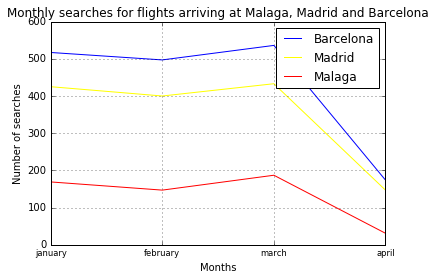

In [50]:
#plot 3 curves for 3 cities 
plt.plot(df[[1]],color='blue',label='Barcelona')
plt.plot(df[[2]],color='yellow',label='Madrid')
plt.plot(df[[0]],color='red', label='Malaga')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Number of searches')
plt.title('Monthly searches for flights arriving at Malaga, Madrid and Barcelona')
plt.grid(True)
plt.xticks(range(1,5),['january','february','march','april'],size='small')
plt.xlim(1,4)
plt.show()

Exercise3/Bonus exercise: Match searches with bookings For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

In [51]:
booking_dest=booking[['dep_port','arr_port']]# extract clolumns 'dep_port' and 'arr_port' from the 'booking' data 
booking_dest['booking']=1# add a column called 'booking'
booking_dest.head(1)

C:\Users\minhp_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,dep_port,arr_port,booking
0,ZRH,LHR,1


In [52]:
booking_dest=booking_dest.rename(columns={'dep_port':'Origin','arr_port':'Destination'})# rename columns for merge
booking_dest.head(1)

,Origin,Destination,booking
0,ZRH,LHR,1


In [28]:
# match Service with Booking
result = search.drop_duplicates().merge(booking_dest.drop_duplicates(),on=['Origin','Destination'], how='left')
result= result.fillna(0)# substitue NA by 0 in the column 'booking'
result.booking.unique# to see the values of this column, which are normally binary : 0 or 1.

<bound method Series.unique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
99970    0.0
99971    0.0
99972    0.0
99973    0.0
99974    0.0
99975    0.0
99976    0.0
99977    0.0
99978    0.0
99979    0.0
99980    0.0
99981    0.0
99982    0.0
99983    0.0
99984    0.0
99985    0.0
99986    0.0
99987    0.0
99988    0.0
99989    0.0
99990    0.0
99991    0.0
99992    0.0
99993    0.0
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: booking, dtype: float64>

In [30]:
# generata a csv file
result.to_csv('search_pred.csv')

Bonus Exercise: write a wep service
Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output). The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X.

In [54]:
# the output of the second exercise:
out
# Optional:out.to_csv('out_ext.csv')

,name,IATA_code,pax
0,London Heathrow Airport,LHR,1006
1,Orlando International Airport,MCO,861
2,John F Kennedy International Airport,JFK,795
3,Los Angeles International Airport,LAX,761
4,Suvarnabhumi,BKK,747
5,McCarran International Airport,LAS,732
6,San Francisco International Airport,SFO,705
7,Chicago O'Hare International Airport,ORD,686
8,Paris - Charles-de-Gaulle,CDG,676
9,Dubai International Airport,DXB,587
